In [6]:
import numpy as np

## 初始化pi: 
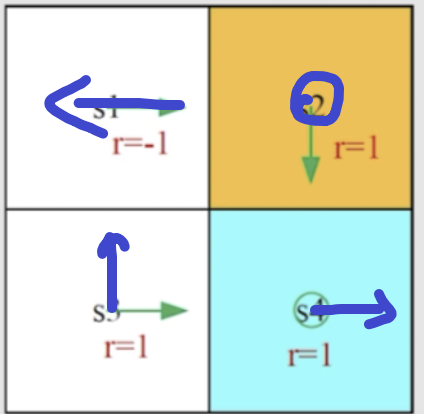

In [8]:
# pi(a|s), (s, a) = (4, 5)
pi_init = np.array([[0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1],
                    [1, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0]])

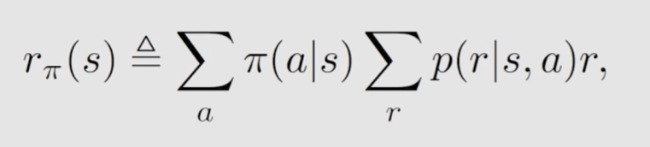

In [17]:
def get_r_proba(s, a):
        # reward: index
        p_r = {0: 0, -1: 1, 1: 2}
        # (s, a, p_r)
        # p_r: p(0), p(-1), p(1)
        r_proba = np.zeros(shape=(4, 5, 3))
        # 在第s状态执行a动作获得的第i个奖励分布为1
        r_proba[0][0][p_r[-1]] = 1
        r_proba[0][1][p_r[-1]] = 1
        r_proba[0][2][p_r[0]] = 1
        r_proba[0][3][p_r[-1]] = 1
        r_proba[0][4][p_r[0]] = 1

        r_proba[1][0][p_r[-1]] = 1
        r_proba[1][1][p_r[-1]] = 1
        r_proba[1][2][p_r[1]] = 1
        r_proba[1][3][p_r[0]] = 1
        r_proba[1][4][p_r[-1]] = 1

        r_proba[2][0][p_r[0]] = 1
        r_proba[2][1][p_r[1]] = 1
        r_proba[2][2][p_r[-1]] = 1
        r_proba[2][3][p_r[-1]] = 1
        r_proba[2][4][p_r[0]] = 1

        r_proba[3][0][p_r[-1]] = 1
        r_proba[3][1][p_r[-1]] = 1
        r_proba[3][2][p_r[-1]] = 1
        r_proba[3][3][p_r[0]] = 1
        r_proba[3][4][p_r[1]] = 1

        return r_proba[s][a]

def get_P_r_given_s_a(pi):

    # pi(a|s), (s, a) = (4, 5)

    # P(r|s,a), (s, a, r) = (4, 5, 3)
    P_r_given_s_a = np.zeros(shape=(4, 5, 3))
    # a(s)
    a_given_s = np.argmax(pi, axis=1)

    for s, a in enumerate(a_given_s):
        # 在第s个状态执行a动作获得奖励的分布
        P_r_given_s_a[s][a] = get_r_proba(s, a)
    
    return P_r_given_s_a

In [24]:
# P(r|s,a), (s, a, r) = (4, 5, 3)
P_r_given_s_a = get_P_r_given_s_a(pi_init)
# r(s, a), (s, a) = (4, 5)
r_given_s_a = np.array([[-1, -1, 0, -1, 0],
                        [-1, -1, 1, 0, -1],
                        [0, 1, -1, -1, 0],
                        [-1, -1, -1, 0, 1]])
E_r = np.einsum("sar, sa->ar", P_r_given_s_a, r_given_s_a)
# r_pi, (s, a) = (4, 3)
r_pi = pi_init @ E_r
E_r

array([[ 0.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0., -1.,  0.]])

In [ ]:
def get_v_pi(pi, P_r_given_s_a, r_given_s_a):
    # # 查看pi
    # print(pi)
    # # 根据pi给出reward
    # reward = []
    # for _ in range(5):
    #     reward.append(int(input("reward: ")))

    # (4, )
    a_given_s = np.argmax(pi, axis=1)
    # (4, 1)
    r_pi = []
    for i in range(4):
        r_pi.append([r_given_s_a[i][a_given_s[i]]])

    # 初始化v list
    v_li = []
    v_li.append(np.array([[0],[0],[0],[0]]))
    omega = 0.9
    P = np.zeros(shape=(4, 4))
    for s in range(4):
        for s_prime in range(4):
            P[s, s_prime] = pi[s, np.argmax(pi[s])]
    P = np.array([[0, 1, 0, 0],
                  [0, 0, 0, 1],
                  [0, 0, 0, 1],
                  [0, 0, 0, 1]])

    for i in range(1, 300):
        v = r_pi + omega * P @ v_li[i - 1]
        v_li.append(v)
    return v_li[-1]

In [ ]:
def get_P_sPrime_given_a_s():
    P_sPrime_given_a_s = np.zeros(shape=(4, 5, 4))
    P_sPrime_given_a_s[0][0][0] = 1
    P_sPrime_given_a_s[0][1][1] = 1
    P_sPrime_given_a_s[0][2][2] = 1
    P_sPrime_given_a_s[0][3][0] = 1
    P_sPrime_given_a_s[0][4][0] = 1

    P_sPrime_given_a_s[1][0][1] = 1
    P_sPrime_given_a_s[1][1][1] = 1
    P_sPrime_given_a_s[1][2][3] = 1
    P_sPrime_given_a_s[1][3][0] = 1
    P_sPrime_given_a_s[1][4][1] = 1

    P_sPrime_given_a_s[2][0][0] = 1
    P_sPrime_given_a_s[2][1][3] = 1
    P_sPrime_given_a_s[2][2][2] = 1
    P_sPrime_given_a_s[2][3][2] = 1
    P_sPrime_given_a_s[2][4][2] = 1

    P_sPrime_given_a_s[3][0][1] = 1
    P_sPrime_given_a_s[3][1][3] = 1
    P_sPrime_given_a_s[3][2][3] = 1
    P_sPrime_given_a_s[3][3][2] = 1
    P_sPrime_given_a_s[3][4][3] = 1

    return P_sPrime_given_a_s

In [ ]:




omega = 0.9
# P_sPrime_given_a_s[i][j][k]表示第i个状态执行j动作转移到k状态的概率
P_sPrime_given_a_s = get_P_sPrime_given_a_s()           


P = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [1, 0, 0, 0],
              [0, 0, 0, 1]])
